## Modeling
**PyCaret**, an open-source and low-code machine learning library in Python, was used to identify the best classification model for this churn use case. PyCaret also automates the whole machine learning process, including some data preparation steps like normalization and fixing class imbalance.

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.0)
pd.set_option('display.max_columns', 50)

%matplotlib inline

In [ ]:
!pip install pycaret

     |████████████████████████████████| 320 kB 4.1 MB/s 
     |████████████████████████████████| 6.8 MB 8.8 MB/s 
     |████████████████████████████████| 1.3 MB 32.9 MB/s 
     |████████████████████████████████| 118 kB 48.5 MB/s 
     |████████████████████████████████| 1.7 MB 50.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 53.5 MB/s 
     |████████████████████████████████| 261 kB 48.0 MB/s 
     |████████████████████████████████| 16.8 MB 51.3 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 167 kB 52.1 MB/s 
     |████████████████████████████████| 88 kB 6.1 MB/s 
     |████████████████████████████████| 636 kB 47.3 MB/s 
     |████████████████████████████████| 303 kB 50.5 MB/s 
     |████████████████████████████████| 3.1 MB 46.3 MB/s 
     |██████████████████

In [ ]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Inspect Final Dataframe

In [ ]:
final_df = pd.read_csv('bankchurners_final_df.csv', index_col = 'Unnamed: 0')
print(final_df.columns)
final_df.head()

Index(['dependent_count', 'months_on_book', 'total_relationship_count',
       'months_inactive_12_mon', 'contacts_count_12_mon',
       'total_revolving_bal', 'avg_open_to_buy', 'total_amt_chng_q4_q1',
       'total_trans_amt', 'total_trans_ct', 'total_ct_chng_q4_q1',
       'avg_utilization_ratio', 'churned', 'average_trans_amt', 'gender_F',
       'education_level_College', 'education_level_Doctorate',
       'education_level_Graduate', 'education_level_High School',
       'education_level_Post-Graduate', 'education_level_Uneducated',
       'marital_status_Divorced', 'marital_status_Married',
       'marital_status_Single', 'income_category_$120K +',
       'income_category_$40K - $60K', 'income_category_$60K - $80K',
       'income_category_$80K - $120K', 'income_category_Less than $40K',
       'card_category_Blue', 'card_category_Gold', 'card_category_Platinum',
       'card_category_Silver'],
      dtype='object')


,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,churned,average_trans_amt,gender_F,education_level_College,education_level_Doctorate,education_level_Graduate,education_level_High School,education_level_Post-Graduate,education_level_Uneducated,marital_status_Divorced,marital_status_Married,marital_status_Single,income_category_$120K +,income_category_$40K - $60K,income_category_$60K - $80K,income_category_$80K - $120K,income_category_Less than $40K,card_category_Blue,card_category_Gold,card_category_Platinum,card_category_Silver
0,3,39,5,1,3,777.0,11914.0,1.335,1144.0,42,1.625,0.061,0,27.238095,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,5,44,6,1,2,864.0,7392.0,1.541,1291.0,33,3.714,0.105,0,39.121212,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
2,3,36,4,1,0,0.0,3418.0,2.594,1887.0,20,2.333,0.000,0,94.350000,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
3,4,34,3,4,1,2517.0,796.0,1.405,1171.0,20,2.333,0.760,0,58.550000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4,3,21,5,1,0,0.0,4716.0,2.175,816.0,28,2.500,0.000,0,29.142857,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0


In [ ]:
#check the shape of data
final_df.shape

(10127, 33)

## PyCaret

In [ ]:
# 80-20 split on training data and unseen data
data = final_df.sample(frac=0.80, random_state=786)
data_unseen = final_df.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (8102, 33)
Unseen Data For Predictions: (2025, 33)


In [ ]:
# setup() is having trouble detecting numerical data types
# create a list containing all numeric features so that they are not tagged as categories
final_df_num = list(final_df.select_dtypes(include=['int64','float64']).columns)
# remove the target variable from the list
final_df_num.remove('churned')
final_df_num

['dependent_count',
 'months_on_book',
 'total_relationship_count',
 'months_inactive_12_mon',
 'contacts_count_12_mon',
 'total_revolving_bal',
 'avg_open_to_buy',
 'total_amt_chng_q4_q1',
 'total_trans_amt',
 'total_trans_ct',
 'total_ct_chng_q4_q1',
 'avg_utilization_ratio',
 'average_trans_amt',
 'gender_F',
 'education_level_College',
 'education_level_Doctorate',
 'education_level_Graduate',
 'education_level_High School',
 'education_level_Post-Graduate',
 'education_level_Uneducated',
 'marital_status_Divorced',
 'marital_status_Married',
 'marital_status_Single',
 'income_category_$120K +',
 'income_category_$40K - $60K',
 'income_category_$60K - $80K',
 'income_category_$80K - $120K',
 'income_category_Less than $40K',
 'card_category_Blue',
 'card_category_Gold',
 'card_category_Platinum',
 'card_category_Silver']

In [ ]:
# use setup() to prepare the data
churn_clf = setup(data = data,
                  target = 'churned',
                  session_id=123,
                  numeric_features = final_df_num,
                  normalize = True,
                  fix_imbalance = True)

,Description,Value
0,session_id,123
1,Target,churned
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(8102, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


### **Comparing all models**

In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9683,0.9913,0.8988,0.9015,0.8999,0.8810,0.8812,0.503
gbc,Gradient Boosting Classifier,0.9580,0.9850,0.8987,0.8468,0.8716,0.8466,0.8474,2.566
rf,Random Forest Classifier,0.9575,0.9848,0.8642,0.8681,0.8657,0.8405,0.8408,1.486
ada,Ada Boost Classifier,0.9429,0.9784,0.8853,0.7840,0.8306,0.7964,0.7993,0.679
et,Extra Trees Classifier,0.9413,0.9774,0.7562,0.8576,0.8033,0.7689,0.7713,1.066
dt,Decision Tree Classifier,0.9222,0.8784,0.8141,0.7292,0.7680,0.7216,0.7241,0.154
qda,Quadratic Discriminant Analysis,0.8956,0.9198,0.6749,0.6750,0.6716,0.6098,0.6120,0.077
lr,Logistic Regression,0.8702,0.9347,0.8485,0.5605,0.6745,0.5978,0.6182,0.400
svm,SVM - Linear Kernel,0.8642,0.0000,0.8318,0.5488,0.6603,0.5801,0.6004,0.115
ridge,Ridge Classifier,0.8640,0.0000,0.8574,0.5457,0.6665,0.5864,0.6104,0.065


In [ ]:
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
# use models() function to see the list of all classifiers available
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


### **Finalize Model for Deployment**

In [ ]:
# finalize model
final_model = finalize_model(best_model)

### **Predict on unseen data**

In [ ]:
# predict on unseen data
unseen_predictions = predict_model(final_model, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9719,0.9929,0.8929,0.9346,0.9132,0.8965,0.8968


,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,...,income_category_$40K - $60K,income_category_$60K - $80K,income_category_$80K - $120K,income_category_Less than $40K,card_category_Blue,card_category_Gold,card_category_Platinum,card_category_Silver,Label,Score
0,5,44,6,1,2,864.0,7392.0,1.541,1291.0,33,...,0,0,0,1,1,0,0,0,0,0.9992
1,2,36,3,1,2,1247.0,2763.0,1.376,1088.0,24,...,1,0,0,0,1,0,0,0,0,0.9993
2,3,36,5,2,0,2517.0,19835.0,3.355,1350.0,24,...,0,1,0,0,1,0,0,0,0,0.9994
3,1,36,3,6,0,0.0,11751.0,3.397,1539.0,17,...,0,0,1,0,1,0,0,0,0,0.9964
4,1,56,2,2,3,2517.0,676.0,1.831,1336.0,30,...,1,0,0,0,1,0,0,0,0,0.9784


In [ ]:
# predict on unseen data
unseen_predictions = predict_model(final_model, data=data_unseen)
unseen_predictions[['Label', 'Score']].head(15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9719,0.9929,0.8929,0.9346,0.9132,0.8965,0.8968


,Label,Score
0,0,0.9992
1,0,0.9993
2,0,0.9994
3,0,0.9964
4,0,0.9784
5,0,0.9985
6,0,0.9762
7,1,0.9065
8,1,0.9959
9,1,0.9279


### Feature importance plot

Feature importance was also conducted to identify the top variables or reasons for customer churn.

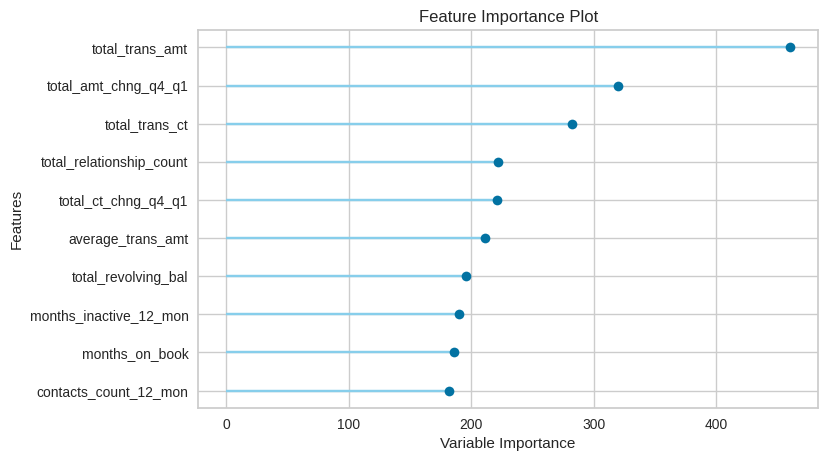

In [ ]:
# feature importance to identify top reasons for churn
# check pycaret documentation
plot_model(final_model, plot='feature')

### Plot Visualizations for the Top 3 Important Features

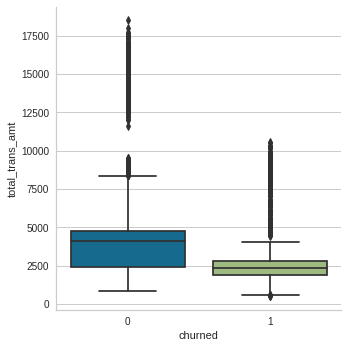

In [ ]:
# top 1
sns.catplot(x = "churned", y = "total_trans_amt", kind = "box", data = final_df)

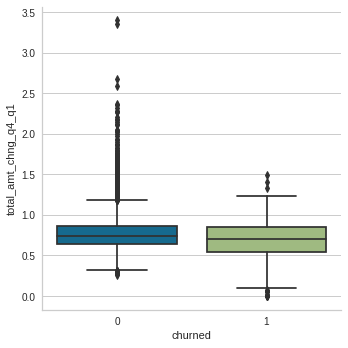

In [ ]:
# top 2
sns.catplot(x = "churned", y = "total_amt_chng_q4_q1", kind = "box", data = final_df)

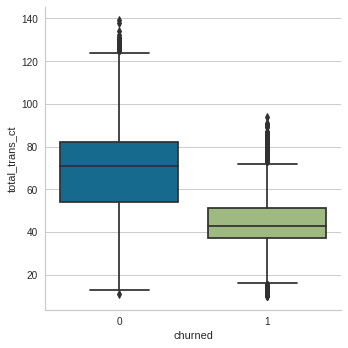

In [ ]:
# top 3
sns.catplot(x = "churned", y = "total_trans_ct", kind = "box", data = final_df)

### References Used:
1. Github Sample Notebook
* Tutorial - Binary Classification
https://github.com/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Binary%20Classification.ipynb
2. PyCaret Documentation
* Pre-processing documentation <br>
https://pycaret.gitbook.io/docs/get-started/preprocessing/data-preparation